# **Automatic eye diseases classification of optical coherence tomography (OCT) images using machine learning model** <br>

**Authors: Stella Bae, Pratyasha Bhatta,Helia Rahimi,Young Wang<br>**

<a id='Summary'></a>
# Summary

In this project we set to develop a machine learning model with ResNet framework to distinguish the abnormalities from the normal eye scan and then classify those three diseases with grayscale images.  

The process is organized as follows:

1. [Background](#Background)
1. [Data Loading and Structure](#Data_loading_structure)
1. [Data Augmentation](#Data_Augmentation)
1. [Data Inspection and Data Imbalance](#Data_Inspection_and_Data_Imbalance)
1. [Preparing Train, Validation & Test Data](#Preparing_Train,_Validation_&_Test_Data)
1. [Setting Up GPU](#Setting_Up_GPU)
1. [Choosing Model Performance Metrics](#Choosing_Model_Performance_Metrics)
1. [Selectting Cost Function for the Task](#Selectting_Cost_Function_for_the_Task)
1. [Model Selection: ResNET](#Model_Selection:_ResNET)
1. [Transfer Learining](#Transfer_Learining)
1. [Model Training and Evaluating](#Model_Training_and_Evaluating)
1. [Accuracy and Loss Plots](#Accuracy_and_Loss_Plots)
1. [Predicting on Test Set](#Predicting_on_Test_Set)
1. [Confusion Matrix](#Confusion_Matrix)
1. [Predictions Presentation](#Predictions_Presentation)
1. [Conclusion](#Conclusion)
1. [References](#References)

<a id='Background'></a>
# Background

Optical coherence tomography (OCT) is a promising non-invasive imaging modality which provides high-resolution structural images of the retina, retinal fiber layer and optic nerve head. It has revolutionized the clinical practice of ophthalmology due to its exceptional resolution of cross-sectional image. Machine learning approach has been widely implemented to automatically classify different eye diseases based on the complex morphological details of the OCT eye scan, as the immense amounts of data often overwhelm the human expects. The most common retinal diseases are choroidal neovascularization (CNV), diabetic macular edema (DME), and drusen. Depending on the level of severity, surgical interventions can be performed to address those diseases. In order to proceed with surgery and to know which surgery to perform, surgeons need to have a clear identification of the specific diseases. 


Approximately 30 million OCT scans are performed each year, and the analysis and interpretation of these images takes up a significant amount of time. The correct analysis and interpretation leads to an informative diagnosis and treatment plan. For instance, patients with DME or CNV may require immediate medical intervation. Whereas for cases like drusen or normal, they only need a routine referral. 

<a href="https://ibb.co/FD0s2FH"><img src="https://i.ibb.co/rwcbYVd/Screen-Shot-2021-04-08-at-10-05-03-PM.png" alt="Screen-Shot-2021-04-08-at-10-05-03-PM" border="0"></a>

(A) (Far left) choroidal neovascularization (CNV) with neovascular membrane (white arrowheads) and associated subretinal fluid (arrows). (Middle left) Diabetic macular edema (DME) with retinal-thickening-associated intraretinal fluid (arrows). (Middle right) Multiple drusen (arrowheads) present in early AMD. (Far right) Normal retina with preserved foveal contour and absence of any retinal fluid/edema.

## What are the diseases studied in this work, and why is it essential to diagnose them?
**Drusen:** Drusen are yellow deposits of cellular debris under the retina, made up of lipids and proteins. They are more prevalent among women than men and can be found in mostly older adults aged over 60. A few small drusen are safe. However, several large ones may indicate an early stage of age-related macular degeneration (AMD), a disease that affects the macula, the area of the retina responsible for central vision, and can seriously damage the vision. Common symptoms of AMD include hazy vision, difficulty seeing while shifting from bright light to low light, and a blank or blurry spot in the central vision.  Most people with drusen do not have any symptoms. In a routine eye exam, the presence of them can be exposed, and if several large drusen are detected, it can be the sign of early-stage AMD. The early diagnosis of drusen leads to the early treatment of AMD which can slow down the disease's progression and minimize vision loss.

**Diabetic Macular Edema (DME):** Diabetic Macular Edema (DME) is an accumulation of fluid in the macula part of the retina that controls our most detailed vision abilities. In order to develop DME, you must first have diabetic retinopathy. Diabetic retinopathy is a disease that damages the blood vessels in the retina, resulting in vision impairment. Left untreated, these blood vessels begin to build up pressure in the eye and leak fluid, causing DME. DME usually takes on two forms: 1) Focal DME, which occurs because of abnormalities in the blood vessels in the eye, and 2) Diffuse DME, which occurs because of widening/swelling retinal capillaries (very thin blood vessels). Diabetic retinopathy and DME are common problems for diabetics. Roughly 10% of the Canadian population is diabetic, and about 25% of those diabetics have eye trouble because of it. Common symptoms of DME include blurry vision, floaters, double vision, and eventually blindness if it goes untreated. The treatments for focal and diffuse DME differ, but they both involve laser procedures. Most doctors use focal laser treatment to treat focal DME and grid laser treatment to treat diffuse DME. The goal of both kinds of procedures is to stop the leakage in the macula. 

**Choroidal neovascularization (CNV):** Choroidal neovascularization (CNV) is the growth of pathologic new blood vessels and is the most important sequella of age-related macular degeneration (AMD). Choroidal neovascularization is a common cause of neovascular degenerative maculopathy commonly exacerbated by extreme myopia, malignant myopic degeneration, or age-related developments. As well as in wet macular degeneration, CNV can also occur frequently with the rare genetic disease pseudoxanthoma elasticum and rarely with the more common optic disc drusen. CNV has also been associated with extreme myopia or malignant myopic degeneration, where in choroidal neovascularization occurs primarily in the presence of cracks within the retinal (specifically) macular tissue known as lacquer cracks.The symptoms of CNV include a distortion or waviness of central vision or a gray/black/void spot in the central vision. Hemorrhaging of the new blood vessels can accelerate the onset of symptoms of CNV. CNV may also include the feeling of pressure behind the eye.Treatment options for some people who progress to neovascular AMD include laser photocoagulation, photodynamic therapy with verteporfin, submacular surgery, and antiangiogenic drugs. At this time, treatments for selected cases of neovascular AMD reduce the risk of vision loss rather than improve vision. Therefore, for the vision to remain at a relatively good level after treatment, the
choroidal neovascularization (CNV) must be identified and
treated when the vision is relatively good.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
import cv2
import copy

import torch
import torch.nn as nn
from collections import Counter
import torch.nn.functional as F
import torchvision
from torchvision import datasets

import torchvision.transforms as tt
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import matplotlib.gridspec as gridspec

from torch.utils.data import random_split, DataLoader

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

%matplotlib inline 
import os
print(os.listdir('../input'))


['kermany2018']


<a id='Data_loading_structure'></a>
#  1. Data Loading and Structure

We start off our project by importing a [Kaggle OCT dataset](https://www.kaggle.com/paultimothymooney/kermany2018). This dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (NORMAL, CNV, DME, DRUSEN). This dataset were collected from retrospective cohorts of adult patients from the Shiley Eye Institute of the University of California San Diego, the California Retinal Research Foundation, Medical Center Ophthalmology Associates, the Shanghai First People’s Hospital, and Beijing Tongren Eye Center between July 1, 2013 and March 1, 2017.

This dataset is saved as grayscale images in the format of high resolution JPEG. Each image went through a tiered grading system consisting of multiple layers of trained graders of increasing expertise for verification and correction of image labels. 

In this work we have adopted [Pneumonia Detection ResNets Pytorch](https://www.kaggle.com/teyang/pneumonia-detection-resnets-pytorch), presented implementation as baseline and applied it to our proposed OCT dataset.

We start by loading the dependencies and data, and exploring the dataset to look at its structure. This dataset consists of 83484, 964, 32 images in the training, testing and validating sets respectively. 

In [2]:
data_dir = '../input/kermany2018/OCT2017 '

# Data Parameters
train = 'train'
val = 'val'
test = 'test'
data_type = [train, val, test]

print(os.listdir(data_dir))

['val', 'test', 'train']


<a id='Data_Augmentation'></a>
#  2. Data Augmentation 
Here we only use 41,742 images out of 83,484 images from the training set for the sake of saving computational resource such as memory usage and computional time. However, typical machine learning approach replies on a huge number of the data samples. A convolutioanl network, due to its in-variance property, can perform classification task despite the variance in data dimensions, orientations or grayscale values. Hence, it is possbile to employ a technique called "data augmentation" to artifically inflate the variation in the exsiting data set through affine transformation.Data Augmentation is a strategy that enables us to significantly increase the diversity of data available for training models without actually collecting new data. 

By augmentating the exsting data, we essentially create a new data set with diffenernt orientations, dimensions, or grayscale values, which is often to be considered as a more comprehensive representaion of the ideal dataset. Data augmentation increases the model performance by feeding the model a more generalized dataset, in turn, reduces the likelihood of model overfitting. 

Some basic data augmentation techniques such as flipping, rotation, shearing, cropping, zoom-in/out and random contrast or brightest adjustment are explored here. Flipping refers to flip the image either in the horizontal or vertical direction. Rotation operation moves the image with a specific angle. 

Performance degradation is observed once the normalization operation is applied. Hence, we intentionally omitted this step in the data pre-processing.

It is also important to mention that only the training data is fully augmented to prevent overfitting, whereas the validation and test data are partially augmented for hyperparameters adjustment, that is, cropping to the same dimention as the training data. 

Specifically, each image data is transformed in as a tensor prior loading it to the CPU or GPU. We utilized an embedded  *torchvision.transforms* from Pytorch so that we can perform the following operations to each image:

1.   Resize and crop to 128x128 as many images are of different sizes.

1.   Data Augmentation: random horizontal flip, random rotation and randomly assign grayscale.
2.   Convert images into PyTorch tensors.

In [3]:
# Model parameters
image_size = 128
patch_size = 128 


data_transforms = {
    train: tt.Compose([
        tt.RandomResizedCrop(image_size),
        tt.RandomHorizontalFlip(),
        tt.RandomRotation(5),
        tt.RandomGrayscale(),
        tt.RandomAffine(translate=(0.05,0.05), degrees=0),
        tt.ToTensor(),
    ]),
    val: tt.Compose([
        tt.Resize(image_size),
        tt.CenterCrop(image_size),
        tt.RandomGrayscale(),
        tt.ToTensor(),
    ]),
    test: tt.Compose([
        tt.Resize(image_size),
        tt.CenterCrop(image_size),
        tt.RandomGrayscale(),
        tt.ToTensor(),
    ]),
}

image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), 
    transform=data_transforms[x])
    for x in data_type
}

dataset_sizes = {x: len(image_datasets[x]) for x in data_type}

Each image is loaded as a tensor with a dimension of [3,128,128]. 3 indicates that each image is transformed as a color image with RGB channels, whereas 128 refers to its height and width respectively.

torch.Size([3, 128, 128]) 0


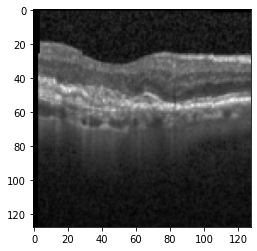

In [4]:
img, label = image_datasets[train][0]
print(img.shape, label)
plt.imshow(img[1,:,:],'gray')
plt.show()

<a id='Data_Inspection_and_Data_Imbalance'></a>
#  3. Data Inspection and Data Imbalance 

We start our project by carefully investigating the training data. Particularly, its label distribution.  We encounter a highly imbalanced dataset, that is, each class in the training data is not represented equally. For example, that we have a much higher percentage of the data with the CNV label as compared to the data with the DME label.

The classification of medical images often have this kind of issue of data imbalance. However, most machine learning algorithms work best when the amount of data in each class are about equal because those algorithms are designed to maximize accuracy and loss functions. For instance, we consider a generic loss function $L$ which represent the average training loss of our model, and the whole training set consists of 44.6% of CNV, 13.6% of DME, 10.3% of Drusen and 31.5% of normal. The loss function for each class can be expressed as $L_{CNV}$, $L_{DME}$,$L_{Drusen}$ and 
$L_{normal}$, respectively. The average training loss $L$ can be described as a weighted sum of each class loss function: 
$L$ =  44.6%$L_{CNV}$+ 13.6%$L_{DME}$+10.3%$L_{Drusen}$+31.5% $L_{normal}$.

Each gradient of $L$ with respect to each class indicates how $L$ changes based on the changes of each class. Furthermore, these values depend on the proportion of training examples in the class. That is, the loss function is heavily influenced by the change in the CNV class, whereas the change in the Drunsen has a minimum effect in the overall loss function. 

If this issue is not properly addressed, we would have the unfortunate situation where we can always predict the correct label of the class with higher percentage, namely, CNV and normal; Yet, incorrectly predicate or not predict the label for DME or Drusen class.

This label distribution analysis suggests that if we want to avoid such undesirable behaviour of our network to favor one or two classes over other class, we need to ensure the loss function of each class is minimized equally based on as if those classes were equal. A natural approach would be obtaining a new and well-balanced dataset for training. Yet, this approach is often impractical. However, there are still a couple of ways that we can get around this obstacle through resampling. 

There are two common implementations of resampling technique. One is called "oversampling", which we oversample the minority class by adding more copies of it. This method is often used when there is a limited data to begin with. Another method is focused on limiting the influence of the majority class, where we intentionally remove some portion of the majority class. The latter is preferred when there is an abundance of the training data, but it can bring a possible drawback where the data we removed may be critical in feature extraction, which could ultimately lead to an underfitting situation (the model is specified, but not generalized). Here we adopt a more complicate version of upsampling where instead of inflating the data by adding copies of the minority class, we rescale the loss function based on the class proportion so that the loss function of each class contributes equally to the overall loss function. This rescaling factor is determined as the inverse of the data distribution. For example, we consider a binary classification problem where the training set consists of 10% class 1 data and 90% class 2 data. And the average training loss is written as $L = 0.1L_1+0.9L_2$. To make sure that L1 and L2 contribute the average loss equally, we can apply rescaling factors to each class loss function so that $L = 0.1(1/0.1)L_1+0.9(1/0.9)L_2$.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


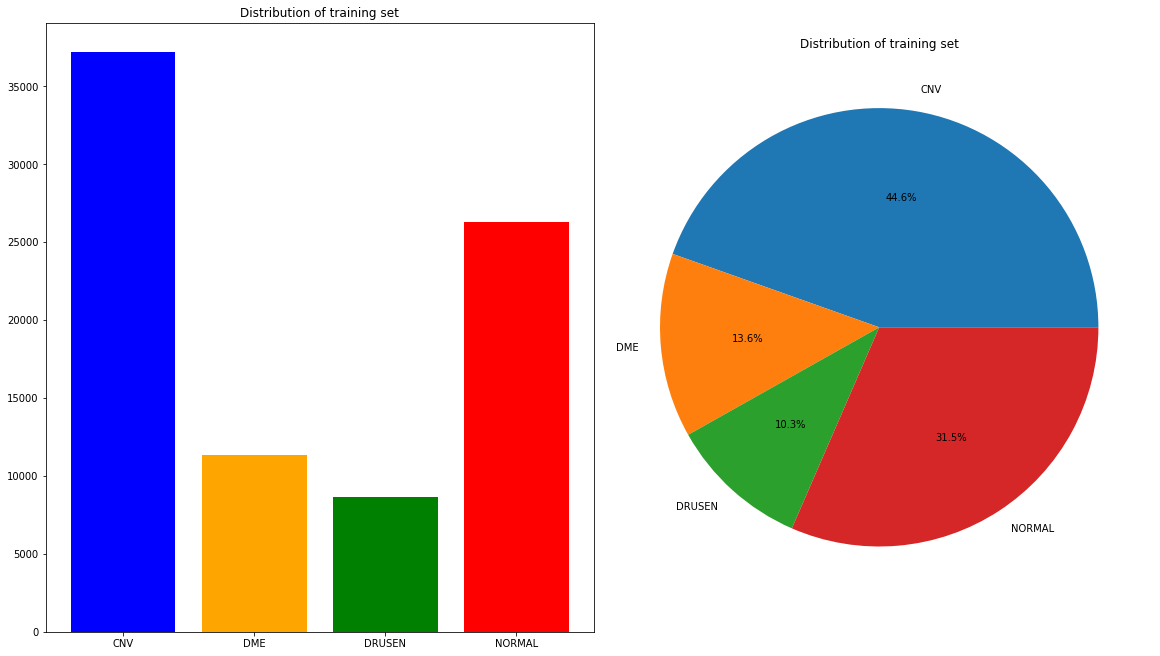

In [5]:
counter = []
per = []
for i in range(len(image_datasets[train].classes)):
    classes = image_datasets[train].targets
    counter.append(Counter(classes)[i])

for i in range(len(image_datasets[train].classes)):
    per.append(counter[i]/sum(counter))

train_weighted_sampler = torch.utils.data.sampler.WeightedRandomSampler(
    per, dataset_sizes[train])
    
%matplotlib inline 
fig = plt.figure(figsize= (16,9),constrained_layout=True)
gs = fig.add_gridspec(1, 2)

ax = fig.add_subplot(gs[0, 0])

colors = ['blue', 'orange','green','red']
ax.bar(image_datasets[train].classes, counter, color = colors)
ax.set_title('Distribution of training set');

ax = fig.add_subplot(gs[0, 1])

ax.pie(per,labels = tuple(image_datasets[train].classes),autopct='%1.1f%%')
ax.set_title('Distribution of training set')

plt.show()

Next, we plot a series of image with different labels. As a semi-trained medical personal, the difference between the normal and abnormal is noticeable. However, the exact difference between those abnormal images cannot be expressed in a coherent manner.  It is required to detect exact yet subtle differences in medical images to make accurate diagnoses. For trained personnel, it takes a considerable amount time to master such skill set after seeing thousands of images. And doctors need a reasonable amount of time to make such diagnosis, and still we cannot guarantee such diagnosis is 100% accurate. Hence, it is desired to train a model so that it can correctly classify those images in a short time frame. 


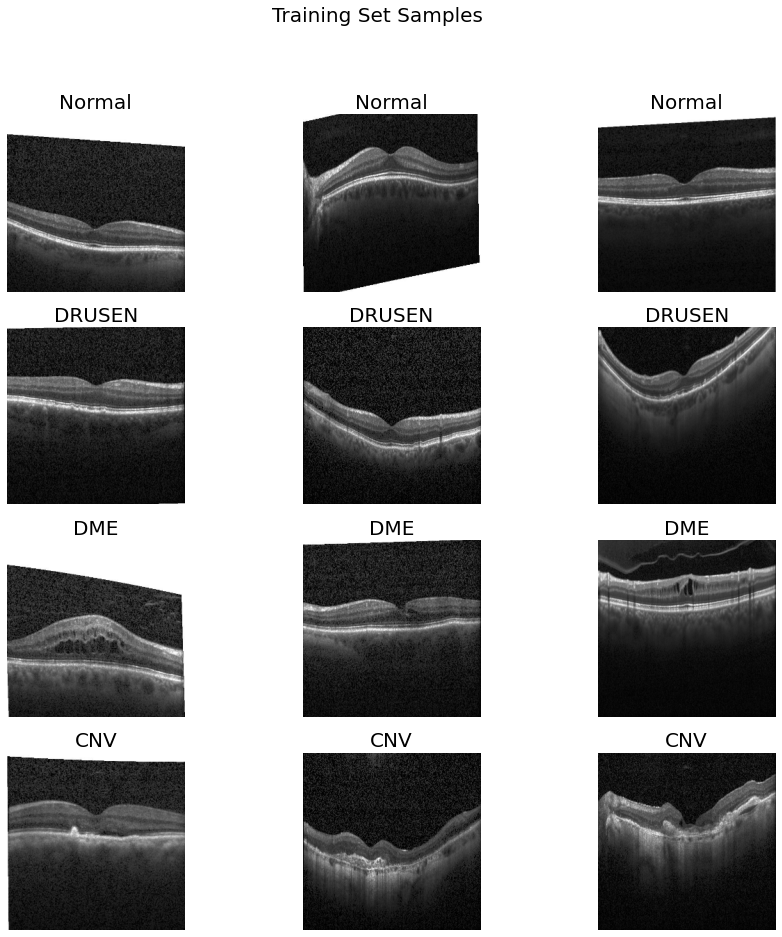

In [6]:
# Function for plotting samples
def plot_samples(samples):  
    fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
    for i in range(len(samples)):
        image = cv2.cvtColor(imread(samples[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (256, 256)) 
        ax[i//3][i%3].imshow(image)
        if i<3:
            ax[i//3][i%3].set_title("Normal", fontsize=20)
        elif 3<= i < 6:
            ax[i//3][i%3].set_title("DRUSEN", fontsize=20)
        elif 6<= i < 9:
            ax[i//3][i%3].set_title("DME", fontsize=20)
        else:
            ax[i//3][i%3].set_title("CNV", fontsize=20)
            
        ax[i//3][i%3].axis('off')
        
## Plot training samples
rand_samples = random.sample([os.path.join(data_dir+'/train/NORMAL', filename) 
                              for filename in os.listdir(data_dir+'/train/NORMAL')], 3) + \
    random.sample([os.path.join(data_dir+'/train/DRUSEN', filename) 
                   for filename in os.listdir(data_dir+'/train/DRUSEN')], 3) + \
    random.sample([os.path.join(data_dir+'/train/DME', filename) 
                   for filename in os.listdir(data_dir+'/train/DME')], 3) + \
    random.sample([os.path.join(data_dir+'/train/CNV', filename) 
                   for filename in os.listdir(data_dir+'/train/CNV')], 3)

plot_samples(rand_samples)
plt.suptitle('Training Set Samples', fontsize=20)
plt.show()

<a id='Preparing_Train,_Validation_&_Test_Data'></a>
#  4. Preparing Train, Validation & Test Data

Prior to training our model, we prepare our training set by taking 50% of the original training data  through random resampling. Then we reserve about 2% of the non-overlapping data from what was used as the training data as the validation set. The purpose of the validation set is to evaluate the trained model while training, providing a reference so we can adjust those hyperparameters such as the learning rate, epoch number, batch size, etc. 

In [7]:
train_size = round(len(image_datasets[train])*0.5) # 
temp = len(image_datasets[train]) - train_size # 99%

train_ds,temps = random_split(image_datasets[train], [train_size,temp])


val_size = round(len(temps)*0.02) # 4%
temp = len(temps) - val_size # 99%

val_ds,_ = random_split(temps, [val_size,temp])

len(train_ds),len(val_ds)

(41742, 835)

Here we have a total of 41,742 images in 128 batches, which means that we will divide 41,742 into 128 batches and each batch contains about 326 samples to train the model.

In [8]:
train_dl = DataLoader(train_ds, patch_size, num_workers=8, pin_memory=True)
val_dl = DataLoader(val_ds, patch_size, num_workers=8, pin_memory=True)

<a id='Setting_Up_GPU'></a>
#  5.  Setting Up GPU
It is reported that the GPU accelerates the matrix operation by a factor of 12.5 which is a much desirable feature in machine learning where the learning often takes a relatively long time. We exploited the GPU provided by Kaggle, a NVidia K80 GPU. Although, the exact speed-up varies based on the implementation of the algorithm and hyperparameter selection, we saw a huge improvement in computation acceleration.

In [9]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
device = get_default_device()
device

device(type='cuda')

In [10]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [11]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device) # yield will stop here, perform other steps, and the resumes to the next loop/batch

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

<a id='Choosing_Model_Performance_Metrics'></a>
#  6.  Choosing Model Performance Metrics

We introduce two metrics for the model performance evaluation: Accuracy and F1 score.  The accuracy involves first using a trained model to make a prediction for each data sample in the either the validation or the test data set. The predictions are then compared to the known labels for those examples in the data set. The classification accuracy is calculated as the proportion of examples being labeled correctly, divided by the total predication that were made on the given data set. 
Classification accuracy is often considered to be the most widely used machine learning performance metric as it is easy to compute and interpret. However, in case of imbalanced data set where the class distribution is not equal across different classes, the accuracy is rendered to be ineffective measure of the model performance. For example, given a dataset with 100 samples where 90% of the samples belong to class 1 and the 10% of the samples belong to class 2, an ill-trained model could make predictions such that all 100 sample are class 1. In this case, this ill-trained model achieved a good accuracy score of 0.9, but it totally failed to classify the minority of the data. 
This means that relying on the simple interpretation of the accuracy works on best for balanced dataset of equal distributon of classes, but the same practice could be misleading for the imbalanced data set we have at hand. 

In case of data imbalance, F1 score is a more suitable measure for the purpose of model evaluation.  

<a href="https://ibb.co/QHztyDT"><img src="https://i.ibb.co/s1kz8WN/Screen-Shot-2021-04-08-at-10-00-24-PM.png" alt="Screen-Shot-2021-04-08-at-10-00-24-PM" border="0"></a>


Statistically, F1 score is the harmonic mean of the precision and recall. The precision is known to  be a positive predicative value as it is the ratio between the true positive and all the positive results. The recall measures the sensitivity of the model with respect to specific labels.

In [12]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1) 
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)), preds

def F1_score(outputs, labels):
    _, preds = torch.max(outputs, dim=1) 
    
    # precision, recall, and F1
    cm  = confusion_matrix(labels, preds)
    tn, fp, fn, tp = cm.ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*((precision*recall)/(precision+recall))
    
    return precision,recall,f1,preds


<a id='Selectting_Cost_Function_for_the_Task'></a>
#  7.  Selectting Cost Function for the Task

Machine learning concerns with establishing a suitable type of cost or loss function and minimizing the loss function during training. In general, the lower the loss function, the better the performance of the model. Here we consider cross-entropy for the loss function used in our model as it is one of the most frequently used loss functions in classification tasks. The concept of cross entropy often come in hand with the softmax activation function, which is normally placed as the last layer of a model and scales numbers or logits into probability. Probability outcomes sum up to one for all of the possible classes.  

For example, we intend to train a model which aims at classifying an image into its correct label, namely CNV, DME, Drunsen and normal. There are 4 total possible labels or outcomes. The last layer of the model generates a logit which is then passed through a softmax layer that transforms the logit into probabilities. Those probabilities are the model’s predictions for each of the 4 classes. Then we assign a prediction label based on its highest probability out of four numerical values to each image. 

Entropy is the number of bits required to transmit a randomly selected event from a probability distribution. Cross-entropy refers to the measure of the difference between two probability distributions for a given random variable or set of events. Based on the information theory, we can encode each event as a certain number of bits and lower probability events have more information (more bits), whereas higher probability events have less information (less bits). The purpose of the cross-entropy is to take those output probability from the softmax activation function and measure the distance from the truth value. To be more specific, each predicted class label is compared to the actual class label which is encoded as 0 or 1, and a score that penalizes the probability based on the distance of the prediction derivation is calculated. The penalty is logarithmic in nature, yielding a large score for large differences (close to 1) and small score for small differences (close to 0). It suggests that, if we train a perfect model, the corresponding cross-entropy would be 0 as the prediction matches perfectly with the actual label, thus, the distance between the predicted and actual label is zero.

To implement what we propose that we start by creating a base model class with functions that will be called with the main model class. Here we break down those function as below: 

*   **training_step**: to load the batch of train 
images and output its loss and accuracy. The gradients will be computed using the output when it is combined with ohter batches later.
*   **train_epoch_end**: to combine the accuracies and losses of all the batches in each epoch and print them out
*   **validation_step**: this step is analgous to what has been done for the traing step with one distinction which is performing over the test data instead of the training. 
*   **validation_epoch_end**: same as for train_epoch_end, but for validation images
*   **epoch_end**: to take all the outputs from train_epoch_end and validation_epoch_end and print out the epoch performance
*   **test_prediction**: this step essentially generates the final output that we are looking for, which is the label prediction on the test data. It will be the key for assessing the model performance. 



In [13]:
class OCTresbase(nn.Module):
        # this is for loading the batch of train image and outputting its loss, accuracy 
    # & predictions
    def training_step(self, batch,weight):
        images,labels = batch
        out = self(images)                                      # generate predictions
        loss = F.cross_entropy(out, labels,weight=weight)      # weighted compute loss

        acc,preds = accuracy(out, labels)                       # calculate accuracy
        
        return {'train_loss': loss, 'train_acc':acc}
    
        # this is for computing the train average loss and acc for each epoch
    def train_epoch_end(self, outputs):
        batch_losses = [x['train_loss'] for x in outputs]       # get all the batches loss
        epoch_loss = torch.stack(batch_losses).mean()           # combine losses
        batch_accs = [x['train_acc'] for x in outputs]          # get all the batches acc
        epoch_acc = torch.stack(batch_accs).mean()              # combine accuracies
        
        return {'train_loss': epoch_loss.item(), 'train_acc': epoch_acc.item()}
    
    # this is for loading the batch of val/test image and outputting its loss, accuracy, 
    # predictions & labels
    def validation_step(self, batch):
        images,labels = batch
        out = self(images)                                      # generate predictions
        loss = F.cross_entropy(out, labels)                     # compute loss
        acc,preds = accuracy(out, labels)                       # calculate acc & get preds
        
        return {'val_loss': loss.detach(), 'val_acc':acc.detach(), 
                'preds':preds.detach(), 'labels':labels.detach()}
    # detach extracts only the needed number, or other numbers will crowd memory
    
    # this is for computing the validation average loss and acc for each epoch
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]         # get all the batches loss
        epoch_loss = torch.stack(batch_losses).mean()           # combine losses
        batch_accs = [x['val_acc'] for x in outputs]            # get all the batches acc
        
        epoch_acc = torch.stack(batch_accs).mean()              # combine accuracies
        
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    # this is for printing out the results after each epoch
    def epoch_end(self, epoch, train_result, val_result):
        print('Epoch [{}], train_loss: {:.4f}, train_acc: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}'.
              format(epoch+1, train_result['train_loss'], train_result['train_acc'],
                     val_result['val_loss'], val_result['val_acc']))
    
    # this is for using on the test set, it outputs the average loss and acc, 
    # and outputs the predictions
    def test_prediction(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()           # combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()              # combine accuracies
        # combine predictions
        batch_preds = [pred for x in outputs for pred in x['preds'].tolist()] 
        # combine labels
        batch_labels = [lab for x in outputs for lab in x['labels'].tolist()]  
        
        return {'test_loss': epoch_loss.item(), 'test_acc': epoch_acc.item(),
                'test_preds': batch_preds, 'test_labels': batch_labels}      


<a id='Model_Selection:_ResNET'></a>
#  8.  Model Selection: ResNET

<a href="https://ibb.co/VMVKwqn"><img src="https://i.ibb.co/L9SGNZj/Screen-Shot-2021-04-08-at-9-10-21-PM.png" alt="Screen-Shot-2021-04-08-at-9-10-21-PM" border="0"></a>

For the model, we select residual neural network (ResNet), a residual deep convolutional neural network which shows high performance in image recognition. It has been seen increasing popularity since its publication. The deep learning model is structured so that learning takes place on a hierarchical set of representation: it learns low, mid and high-level features. In the application of imaging recognition or classification, those translate into edges, shapes and objects. Theoretically, the more layer a given model has, the richer the feature it should obtain from the dataset. Prior to ResNet, a neural network typically had a 16 or more layers. Intuitively, we often think that concatenating more convolutional layers would lead to improved model performance. However, the evidence suggests otherwise: with more layers, the performance will eventually get worse as gradient explodes or vanishes as a results of error gradient accumulation over deeper layers.

<a href="https://ibb.co/khJswz4"><img src="https://i.ibb.co/nDBNY47/Screen-Shot-2021-04-08-at-9-11-40-PM.png" alt="Screen-Shot-2021-04-08-at-9-11-40-PM" border="0"></a>

However, ResNet tackles this problem by skipping some layers. Specifically, it resolves the gradient exploding and vanishing issue by setting up a shortcut so that the gradient can easily flow through the layers, This ensures that the higher layers perform as good as the lower layers and helps reduce the error term and the bias. 

To be more specific, starting from a single convolutional layer and the max pooling, the model follows a series of layers with varying sizes of filters. Here, those filters are all 3 by 3 convolution operation. After every a few convolution operations, that we intentionally skip the layer in-between.

Here we presented the results of using ResNet18. We also explored with ResNet34, ResNet50 and ResNet101. We noticed that, as the layer increases, there is a slight improvement of the performance in terms of accuracy and F1 score but there is also a drastic increase of computation time. 


In [14]:
resnet18 = models.resnet18(pretrained=True)


Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

<a id='Transfer_Learining'></a>
#  9. Transfer Learining
Here we start with a pretrained ResNet18 network for classifing OCT eye images. This approach is termed "transfer learning" in which the network that is used has been pretrained with a large dataset. The weights of the network have already been adjusted and saved, so there is no reason to train the entire network again from the scratch.

The exicting idea behind transfer learning is to take a model trained on one task and apply it to a similar task. This allows a rapid performance assessment and model tuning, enabling quicker deployment overall. Thanks to the vast amount of  resources and time needed to train those models, transfer learning has become increasingly popular. 

The primary constraint of transfer learning is that the model features learned during the first task are general, and not specific to the task on hand. For exmaple that ResNet18 model may be able to recognize a dog or cat but may not  necessarily perform well for OCT eye diseases task.   

In [15]:
class OCTres(OCTresbase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet18(pretrained=True)
        # Freeze training for all layers before classifier
        for param in self.network.fc.parameters():
            param.require_grad = False  
        num_features = self.network.fc.in_features # get number of in features of last layer
        self.network.fc = nn.Linear(num_features, 4) # replace model classifier
    
    def forward(self, xb):
        return self.network(xb)

To properly evaluate the model, we develop some functions to achieve such goal.

*   **evaluate**: calls the validation functions defined in the base model class above and return the output. Validation functions compute the validation average loss and accuracy for each epoch and determind the proper hyperparameters.  
*   **get_lr**: Instead of using a fixed learning rate, we also construct a learning rate scheduler, which calculates the learning rate at batch index. This will change the learning rate after every batch of training. The adaptive apporach of learning rate ensures a faster training. 
*   **fit**: the fit function determines the best hyperparameters for the model and then save such model as the optimal model for our task on hand. 
*  **model.eval()**: informs the network that nothing new is to be learned and the model is used for testing only. 
* **model.train()**  sets the modules in the network in training mode which means that the model knows it has to learn the layers as opposed to the **model.eval()**
*   **torch.no_grad()**: impacts and deactivates autograd engine. It will reduce memory usage and speed up computations. 

In [16]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit(epochs, lr, model, train_loader, val_loader,weight, weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
# def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):

    torch.cuda.empty_cache() # release all the GPU memory cache
    history = {}
    
    
    optimizer = opt_func(model.parameters(), lr)

    best_loss = 1 # initialize best loss, which will be replaced with lower better loss
    for epoch in range(epochs):
        
        # Training Phase 
        model.train() 
        train_outputs = []      
        lrs = []
        
        for batch in train_loader:
            outputs = model.training_step(batch,weight)
#             outputs = model.training_step(batch)

            loss = outputs['train_loss']                          # get the loss
            train_outputs.append(outputs)
            # get the train average loss and acc for each epoch
            train_results = model.train_epoch_end(train_outputs)                        
            loss.backward()                                       # compute gradients
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()                                      # update weights
            optimizer.zero_grad()                                 # reset gradients
        
        
        # Validation phase
        val_results = evaluate(model, val_loader)
        
        # Save best loss
        if val_results['val_loss'] < best_loss and epoch + 1 > 4:
            best_loss = min(best_loss, val_results['val_loss'])
            best_model_wts = copy.deepcopy(model.state_dict())
            #torch.save(model.state_dict(), 'best_model.pt')
        
        # print results
        model.epoch_end(epoch, train_results, val_results)
        
        # save results to dictionary
        to_add = {'train_loss': train_results['train_loss'],
                  'train_acc': train_results['train_acc'],
                 'val_loss': val_results['val_loss'],
                  'val_acc': val_results['val_acc'], 'lrs':lrs}
        
        # update performance dictionary
        for key,val in to_add.items():
            if key in history:
                history[key].append(val)
            else:
                history[key] = [val]
    
    model.load_state_dict(best_model_wts)                         # load best model
    
    return history, optimizer, best_loss
            

In [17]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

model = to_device(OCTres(), device)

<a id='Model_Training_and_Evaluating'></a>
#  10. Model Training and Evaluating
To effectively limit the number of free parameters in the model in order to avoid overfitting, we regularized the cost function by adding a small penalty term: the L2 norm of the weights to the loss function. Weight decay not only prevents the model overfitting but also it ensures that the weights are small to avoid gradient exploding. To be more specific, in each iteration of the optimization, the model will also try to optimize the model weights in addition to the loss as a results of the weight decay added. 

One of the most indispensable steps of developing a deep learning model is to choose a suitable optimization algorithm for the model. The Adam (adaptive moment estimation) optimization algorithm, which we used in this work, is an extension to Stochastic Gradient Descent (SGD) and can be used instead of classical SGD to update the network weights more efficiently.  Currently, it is widely known as the optimization algorithm with the best performance on most problems. It can handle sparse gradients on noisy problems by combining the best properties of the **AdaGrad** and **RMSProp** algorithms. 

To put it briefly, Adam employes **Momentum** and **Adaptive Learning Rates** to converge faster. 

**Momentum**

Consider a ball rolling down a hill; each time (epoch) we roll the ball, it rolls faster towards the local minima in the next iteration, which improves the probability of reaching a better local minimum compared to SGD. The trajectory along which we converge towards the minimum when using SGD has slow progress along the horizontal direction, but it is fast in the vertical direction. This makes the SGD slower than other optimization algorithms. In Momentum, we increment gradient with a variable "v," indicating the velocity in each epoch. 

Assuming x is the gradient, and the gradient descent update and velocity are as follows: 
```
x += -learning_rate * dx,
v = mu * v - learning_rate * dx, #mu is a hyperparameter between 0 and 1, 
```

then the Momentum update looks like the following: 

```
x_momentum += v
```
It is essential to know that the Momentum algorithm accelerates stochastic gradient descent in the relevant direction, as well as dampening oscillations.

**Adaptive Learning Rates:**

In adaptive learning rates, we start with big steps to converge faster; as we get closer to the minima, we take smaller and smaller steps to avoid overstepping the local minimum with big strides. **Adaptive Gradients (AdaGrad)** is a method for changing the learning rate over time.  It enhances performance on problems with sparse gradients (e.g. natural language and computer vision problems). 

The AdaGrad update looks as follows: 
```
cache += dx ** 2

#eps or epsilon is a hyperparameter usually set to 1e-8
x_AdaGrad += -learning_rate * dx / sqrt(cache) + eps

```
Here we scale the gradient by an additional variable cache that we keep accumulating. Observing the trajectory of the convergence towards the minima while using AdaGrad, it can be seen that we have a large gradient vertically which will be added to the cache, and then it will be divided by larger and larger numbers, so we get smaller and smaller updates in the vertical step, but the horizontal direction is very shallow so relative to the vertical direction we end up making faster progress. 

One problem with AdaGrad while training a deep neural network is diminishing learning rates, where the equation's denominator is getting larger, and the learning rate decays towards zero and the model stops learning entirely. **RMSProp or Root Mean Squared Propagation** changed the AdaGrad slightly to fix this problem. To put it simply, RMSProp changes the learning rate slower than AdaGrad, but it still has the benefits of AdaGrad (faster convergence). The cache in RMSProp uses a decay rate hyperparameter which is usually set to 0.99. The RMSProp update is as follows: 
```
cache_RMSProp = decay_rate * cache + (1 - decay_rate) * dx ** 2,
x_RMSProp += -learning_rate * dx / sqrt(cache_RMSProp) + eps
```
The Adam optimizer is a combination of RMSProp and Momentum. 

Following is the Adam update incomplete version: 
```
m = beta1 * m  + (1 - beta1) * dx, which is the update of the first moment, 
v = beta2 * v + (1 - beta2) * (dx ** 2), which is the update of the second moment,
x_Adam += learning_rate * m / sqrt(v) + eps
```

Diederik P. Kingma and Jimmy Ba, who presented Adam optimizer in their paper, applied Adam to the logistic regression algorithm on the MINST digit recognition and compared it with other optimizers, demonstrated as follows:

<a href="https://ibb.co/vXFxdPf"><img src="https://i.ibb.co/9ZD94TB/Screen-Shot-2021-04-08-at-10-01-33-PM.png" alt="Screen-Shot-2021-04-08-at-10-01-33-PM" border="0"></a>


Adam update also comprises a bias correction mechanism to handle the first few steps where m and v are biased at zero. 

With the bias correction mechanism, the Adam update looks as follows, where t is the iteration counter from 1 to infinity: 

```
m = beta1 * m + (1 - beta1) * dx
mt = m / (1 - beta1 ** t)
v = beta2 * v + ( 1-beta2 ) * (dx ** 2)
vt = v / (1 - beta2 ** t)
x_Adam += - learning_rate * mt / (sqrt(vt) + eps)
```



In [18]:
epochs = 20
lr = 0.0005
grad_clip = None
weight_decay = 1e-4
opt_func = torch.optim.Adam
# weighted loss for data class imbalance

weight = np.array(per)
weight = torch.FloatTensor(1/weight).to(device)



history, optimizer, best_loss = fit(epochs, lr, model, train_dl, val_dl,weight,
                                    grad_clip=grad_clip, 
                                    weight_decay=weight_decay, 
                                    opt_func=opt_func)

Epoch [1], train_loss: 0.5600, train_acc: 0.7953, val_loss: 0.5237, val_acc: 0.7751
Epoch [2], train_loss: 0.4396, train_acc: 0.8425, val_loss: 0.4516, val_acc: 0.8165
Epoch [3], train_loss: 0.4144, train_acc: 0.8523, val_loss: 0.5012, val_acc: 0.8002
Epoch [4], train_loss: 0.3984, train_acc: 0.8563, val_loss: 0.3850, val_acc: 0.8364
Epoch [5], train_loss: 0.3881, train_acc: 0.8602, val_loss: 0.4190, val_acc: 0.8481
Epoch [6], train_loss: 0.3805, train_acc: 0.8664, val_loss: 0.3894, val_acc: 0.8490
Epoch [7], train_loss: 0.3700, train_acc: 0.8648, val_loss: 0.3064, val_acc: 0.8872
Epoch [8], train_loss: 0.3601, train_acc: 0.8715, val_loss: 0.3548, val_acc: 0.8685
Epoch [9], train_loss: 0.3538, train_acc: 0.8733, val_loss: 0.3890, val_acc: 0.8429
Epoch [10], train_loss: 0.3576, train_acc: 0.8728, val_loss: 0.3967, val_acc: 0.8393
Epoch [11], train_loss: 0.3522, train_acc: 0.8726, val_loss: 0.3721, val_acc: 0.8481
Epoch [12], train_loss: 0.3437, train_acc: 0.8751, val_loss: 0.3431, val_a

In [19]:
print('Best loss is:', best_loss)
# Save Model
bestmodel = {'model': OCTres(),
              'state_dict': model.state_dict(),
              'optimizer' : optimizer.state_dict()}

torch.save(bestmodel, './OCTResnet.pth')

Best loss is: 0.2507815659046173


In [20]:
# this is for loading the model from a previously saved one

def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model

model = load_checkpoint('./OCTResnet.pth')
# model = to_device(OCTres(), device)

<a id='Accuracy_and_Loss_Plots'></a>
#  11. Accuracy and Loss Plots
Here we show the accuracy and loss plots from ResNet18 model. We note that both validation and training loss decrease after each epoch as a deirect manifestation of amazing ability to generalize prediction with transfer learning models. This further demonstrates that a general learning pattern of our model and that the model was able to achieve a fairly good amount of the training accuracy and loss at the end. 

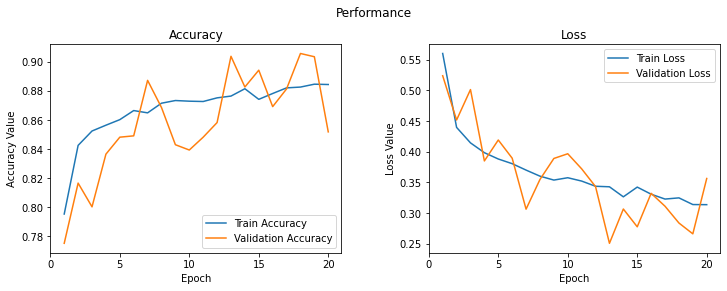

In [21]:
# Plot Accuracy and Loss 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,epochs+1))
ax1.plot(epoch_list, history['train_acc'], label='Train Accuracy')
ax1.plot(epoch_list, history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epochs+1, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history['train_loss'], label='Train Loss')
ax2.plot(epoch_list, history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epochs+1, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")


<a id='Predicting_on_Test_Set'></a>
#  12. Predicting on Test Set
It is important that the model can generalize to other data sets which it was not trained on. To see how well the model performs on the data that it has never seen before, we introduce a test set on which the model will be run and tested for its ability to generalize. The classes in the test set were equally distributed (25% each), which is an ideal case for running a model to make predictions on a test set. The model was able to achieve the test accuracy of 99.71% and the test loss of 1.88%. 

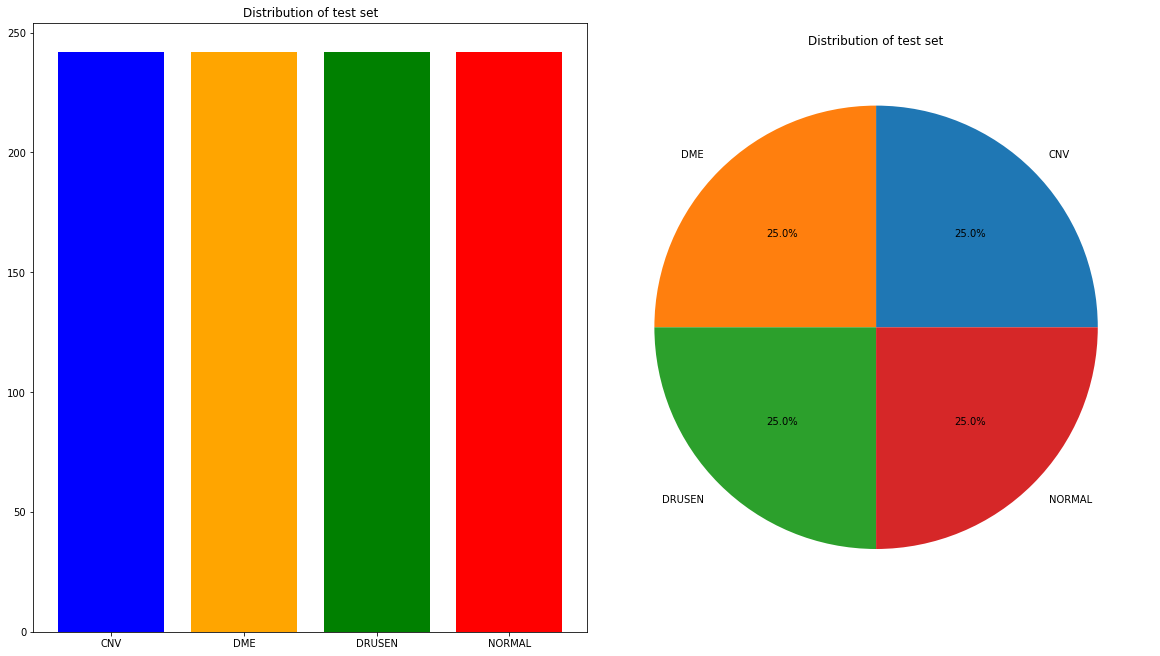

In [22]:
counter = []
per = []
# image_datasets[train].classes
for i in range(len(image_datasets[test].classes)):
    classes = image_datasets[test].targets
    counter.append(Counter(classes)[i])

for i in range(len(image_datasets[test].classes)):
    per.append(counter[i]/sum(counter))

    
train_weighted_sampler = torch.utils.data.sampler.WeightedRandomSampler(
    per, dataset_sizes[train])
    
%matplotlib inline 
fig = plt.figure(figsize= (16,9),constrained_layout=True)
gs = fig.add_gridspec(1, 2)

ax = fig.add_subplot(gs[0, 0])

colors = ['blue', 'orange','green','red']
ax.bar(image_datasets[val].classes, counter, color = colors)
ax.set_title('Distribution of test set');

ax = fig.add_subplot(gs[0, 1])

ax.pie(per,labels = tuple(image_datasets[test].classes),autopct='%1.1f%%')
ax.set_title('Distribution of test set')

plt.show()

In [23]:
@torch.no_grad()
def test_predict(model, test_loader):
    model.eval()
    # perform testing for each batch
    outputs = [model.validation_step(batch) for batch in test_loader] 
    results = model.test_prediction(outputs)                          
    print('test_loss: {:.4f}, test_acc: {:.4f}'
          .format(results['test_loss'], results['test_acc']))
    
    return results['test_preds'], results['test_labels']

In [24]:
# len(image_datasets[test])
test_dl = DataLoader(image_datasets[test], patch_size, num_workers=8, pin_memory=True)

test_dl = DeviceDataLoader(test_dl, device)
preds,labels = test_predict(model.to(device), test_dl)

test_loss: 0.0282, test_acc: 0.9941


<a id='Confusion_Matrix'></a>
#  13. Confusion Matrix
The confusion matrix below shows that 99.7% (965 out of 968) of the images were correctly labelled across all the classes. The F1 score of the model for each class was >99%. The precision and recall metrics show that the model achieved more than 99% as for the positive predictive value and that the model achieved a very high level of sensitivity (>99%) with respect to all the labels.  

<Figure size 432x288 with 0 Axes>

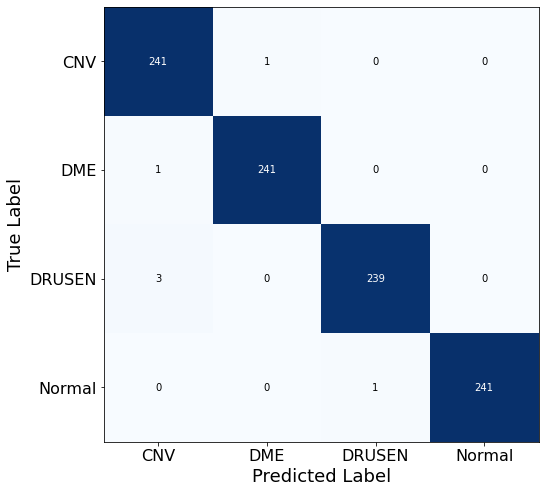

In [25]:
# # Plot confusion matrix
cm  = confusion_matrix(labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),cmap=plt.cm.Blues)
plt.xticks(range(4), ['CNV', 'DME','DRUSEN','Normal'], fontsize=16)
plt.yticks(range(4), ['CNV', 'DME','DRUSEN','Normal'], fontsize=16)
plt.xlabel('Predicted Label',fontsize=18)
plt.ylabel('True Label',fontsize=18)
plt.show()

In [26]:
# Compute Performance Metrics
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

accuracy = (np.array(preds) == np.array(labels)).sum() / len(preds)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*((precision*recall)/(precision+recall))

recall = recall.astype(float)
precision = precision.astype(float)
f1 = f1.astype(float)

print("Accuracy of the model is %.2f"% accuracy)
print('Recall of the model is {}'.format(recall))
print('precision of the model is {}'.format(precision))
print('F1 score of the model is {}'.format(f1))

Accuracy of the model is 0.99
Recall of the model is [0.99586777 0.99586777 0.98760331 0.99586777]
precision of the model is [0.98367347 0.99586777 0.99583333 1.        ]
F1 score of the model is [0.98973306 0.99586777 0.99170124 0.99792961]


<a id='Predictions_Presentation'></a>
#  14. Predictions Presentation 
Here we print out some of the images and their predicted labels. All the images below were labelled correctly. Previously when we did not apply weights decay to resolve the data imbalance issue, we observed that only Normal and CNV images were labelled correctly while DME and Drusen were not. We clearly see the effect of applying weights decay as this time DME and Drusen images were also correctly labelled. 

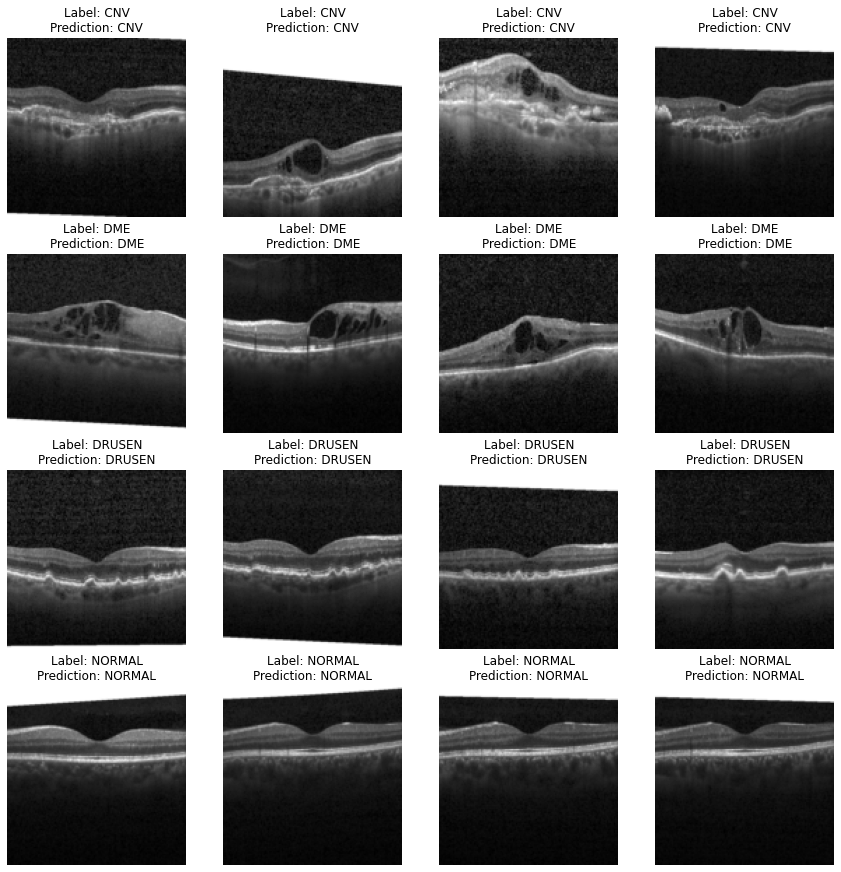

In [27]:
idxs = torch.tensor(np.append(np.arange(start=0, stop=4, step=1), 
                              np.arange(start=300, stop=304, step=1)))
idxs = torch.tensor(np.append(idxs, 
                              np.arange(start=600, stop=604, step=1)))
idxs = torch.tensor(np.append(idxs, 
                              np.arange(start=900, stop=904, step=1)))

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12,12),constrained_layout=True)

for c,i in enumerate(idxs):
    img_tensor, label = image_datasets[test][i]
    ax[c//4][c%4].imshow(img_tensor[0,:,:], cmap='gray')
    ax[c//4][c%4].set_title('Label: {}\nPrediction: {}'
                            .format(image_datasets[test].classes[label], 
                                    image_datasets[test].classes[preds[i]]),
                            fontsize=12)
    ax[c//4][c%4].axis('off')

<a id='Conclusion'></a>
#  Conclusion 
We built a model to classify optical coherence tomography (OCT) images to the three categories of eye diseases including choroidal neovascularization (CNV), diabetic macular edema (DME), drusen, and to the normal category. The OCT data set was obtained from Kaggle in the format of high resolution JPEG. Out of 83,484 images from the training set, we used 41,742 images in order to save computational recources and time. In order to avoid overfitting, we fully augmented the training data to create a data set that is more representitive and generalized. As we encountered a highly imbalanced ataset, we applied upsampling through which we rescaled the loss function based on the class proportion. We trained a total of 41,742 images in 128 batches and we used GPU to accelarate computational speed. We used cross-entropy as our loss function and selected residual neural network (ResNet) for the model. ResNet was used to prevent gradient exploding or vanishing issues, which are often observed in a model with many layers. The model followed a series of layers with varying sizes of filters (3 by 3 convulution operation) and it intentionally skipped layers in between after every a few convolution operations. Our results are based on ResNet 18. We explored other ResNet models with different number of layers (e.g., ResNet 34, ResNet 50, ResNet 101). We noticed a drastic increase of computation time as the number of layerer increased as well as a slight improvement of the performance in terms of accuracy and F1 score. We applied transfer learning for a rapid performance assessment and model tuning. We added $L_2$ norm of the weights to the loss function to lilmit the number of free parameters in the model in order to avoid overfitting. Then we applied Adam optimizer instead of stochastic gradient descent for faster training. Both validation loss and training loss saw a general trend of decreasing in values.The test set was generated so that all the classes were equally distributed. The model was able to achieve the test accuracy of 99.71% and the test loss of 1.88%. The confusion matrix confirmed that 99.7% of the images were correctly predicted across all the classes. The F1 score of the model for each class was >99%. Both precision and recall metrics showed >99% with respect to all the labels, which demonstrates the model's superiority in achieving positive predictive value and sensitivity.   

<a id='References'></a>
# References

[1]	F. Li, H. Chen, Z. Liu, X. Zhang, M. Jiang, Z. Wu, and K. ZhouDeep learning-based automated detection of retinal diseases using optical coherence tomography images, Biomedical Optics Express Journal, Vol. 10, Issue 12, pp.6204-6226, 2019. https://doi.org/10.1364/BOE.10.006204  

[2]	J. H. Tan, S. V. Bhandary, S. Sivaprasad, Y. Hagiwara, A. Bagchi, U. Raghavendra, A. K. Rao, B. Raju, N. S. Shetty, A. Gertych, K. C. Chua, and U. R. Acharya, "Age-related macular degeneration detection using deep convolutional neural network," Future Gener. Comp. Sy. 87, 127–135 (2018). 

[3]	F. Li, H. Chen, Z. Liu, X. Zhang, and Z. Wu, "Fully automated detection of retinal disorders by image-based deep learning," Graefe's Arch. Clin. Exp. 257(3), 495–505 (2019). 

[4]	W. Lu; Y. Tong; Y. Yu; Y. Xing; C. Chen; Y. Shen, Deep Learning-Based Automated Classification of Multi-Categorical Abnormalities From Optical Coherence Tomography Images, Translational Vision Science & Technology December 2018, Vol.7, 41. doi:https://doi.org/10.1167/tvst.7.6.41 

[5]	K. He, X. Zhang, S. Ren, J. Sun, Deep Residual Learning for Image Recognition, Computer Vision and Pattern Recognition, 2015.  arXiv:1512.03385  

[6]	Kermany, D. S., Goldbaum, M., Cai, W., Valentim, C., Liang, H., Baxter, S. L., McKeown, A., Yang, G., Wu, X., Yan, F., Dong, J., Prasadha, M. K., Pei, J., Ting, M., Zhu, J., Li, C., Hewett, S., Dong, J., Ziyar, I., Shi, A., … Zhang, K. (2018). Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning. Cell, 172(5), 1122–1131.e9. https://doi.org/10.1016/j.cell.2018.02.010 

[7]	Andrej Karpathy, CS231n Winter 2016: Lecture 6: Neural Networks Part 3 / Intro to ConvNets, [Youtube Post](https://www.youtube.com/watch?v=hd_KFJ5ktUc&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC&index=7)

[8]	Jason BrownLee, Gentle Introduction to the Adam Optimization Algorithm for Deep Learning, [Machine Learning Mastery Blog Post](http://https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20a%20replacement%20optimization,sparse%20gradients%20on%20noisy%20problems.).

[9]	Kurtis Pykes, Adam Optimization Algorithm, [Towards Data Science Blog Post](http://https://towardsdatascience.com/adam-optimization-algorithm-1cdc9b12724a).

[10]	Casper Hansen, Optimizers Explained - Adam, Momentum and Stochastic Gradient Descent, [ML from scratch Blog Post](http://https://mlfromscratch.com/optimizers-explained/#/). 
